In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Analysis

In [3]:
# Load data
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualization

In [7]:
# create a count of gender occurrences
gender_counts = dataset['Genre'].value_counts()

# create the bar plot using go.Figure()
fig = go.Figure([go.Bar(x=gender_counts.index, y=gender_counts.values,
                        marker_color=['#C99003', '#3E926A'])])

# update the layout
fig.update_layout(title='Count of Gender', xaxis_title='Gender', yaxis_title='Count',
                  template='plotly_dark')

# show the plot
fig.show()

In [8]:
# Create a histogram for each column
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataset['Age'], marker=dict(color='#3E926A'), nbinsx=50))
fig.update_layout(title='Age Distribution', xaxis_title='Age', yaxis_title='Count', template='plotly_dark')

# Show the plots
fig.show()

In [9]:
# Create a histogram for each column
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataset['Annual Income (k$)'], marker=dict(color='#3E926A'), nbinsx=50))
fig.update_layout(title='Annual Income Distribution', xaxis_title='Annual Income', yaxis_title='Count', template='plotly_dark')

# Show the plots
fig.show()

In [10]:
# Create a histogram for each column
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataset['Spending Score (1-100)'], marker=dict(color='#3E926A'), nbinsx=50))
fig.update_layout(title='Spending Score Distribution', xaxis_title='Spending Score', yaxis_title='Count', template='plotly_dark')

# Show the plots
fig.show()

# Building the model

In [11]:
# We don't need the Customer Id to make inferences and relations, so we drop the column customer ID from the dataframe
dataset = dataset.drop('CustomerID', axis=1)

In [12]:
# Encoding the gender feature to have numerical values
dataset['is_male'] = dataset['Genre'].replace({'Male': 1, 'Female': 0})

In [13]:
dataset

,Genre,Age,Annual Income (k$),Spending Score (1-100),is_male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,1


In [14]:
# Feature sleection for the model
# Considering only 2 features (Annual income and Spending Score) and no Label available
X = dataset.iloc[:, [2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
# Defining K (number of clusters)
K = 3

# Defining the model
kmeans = KMeans(n_clusters=K)

In [16]:
# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=3)

In [17]:
predictions = kmeans.predict(X)

In [19]:
# create a scatter plot of the data points
fig = go.Figure(data=go.Scatter(x=X[:,0], y=X[:,1], mode='markers', 
                                marker=dict(color=predictions, size=8, opacity=0.8)))

# add the cluster centroids to the plot
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter(x=centroids[:,0], y=centroids[:,1], mode='markers',
                         marker=dict(color='red', size=15, symbol='x')))

# update the layout
fig.update_layout(title='KMeans Clustering', xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)',
                  template='plotly_dark')

# show the plot
fig.show()

In [20]:
distortion = []

In [21]:
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
        #inertia_ is the formula used to segregate the data points into clusters


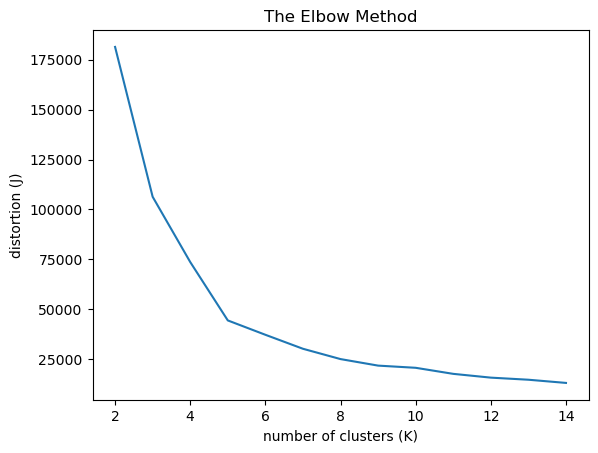

In [22]:
plt.plot(range(2, 15), distortion)
plt.title('The Elbow Method')
plt.xlabel('number of clusters (K)')
plt.ylabel('distortion (J)')
plt.show()

In [24]:
# Defining K (number of clusters)
K = 5

# Defining the model
kmeans = KMeans(n_clusters=K)

# Fit the model to the data
kmeans.fit(X)

predictions = kmeans.predict(X)

# create a scatter plot of the data points
fig = go.Figure(data=go.Scatter(x=X[:,0], y=X[:,1], mode='markers', 
                                marker=dict(color=predictions, size=8, opacity=0.8)))

# add the cluster centroids to the plot
centroids = kmeans.cluster_centers_
fig.add_trace(go.Scatter(x=centroids[:,0], y=centroids[:,1], mode='markers',
                         marker=dict(color='red', size=15, symbol='x')))

# update the layout
fig.update_layout(title='KMeans Clustering', xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)',
                  template='plotly_dark')

# show the plot
fig.show()

# Image Compression with K-means

This code deals with compressing an image using the K-means algorithm. In a standard 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers that indicate the red, green, and blue intensity values (RGB encoding). This results in a large number of colors for images that contain thousands of pixels.

To compress the image, you can reduce the number of colors used in the image, such as limiting it to only 16 colors. This can be achieved by storing only the RGB values of the 16 selected colors, and for each pixel in the image, you need to store only the index of the color at that location, where only 4 bits are required to represent 16 possibilities.

The K-means algorithm will select the 16 colors that will be used to represent the compressed image. This involves treating each pixel in the original image as a data point and using the K-means algorithm to cluster these points based on the RGB values. Once we get the 16 cluster centroids on the image, we can use these 16 colors to replace the pixels in the original image.

The result is an efficient way to represent (compress) the photo, which can be displayed with minimal loss of quality.

In [25]:
# Load image and convert to numpy array
img = Image.open('image.jpg')
img_array = np.array(img)

# Reshape the array to a 2D array of pixels
pixel_array = img_array.reshape(-1, 3)

In [26]:
# define K (the number of clusters)
K = 16

# Instantiate the KMeans model with K clusters
kmeans = KMeans(n_clusters=K)

In [27]:
# Fit the model to the pixel data
kmeans.fit(pixel_array)

KMeans(n_clusters=16)

In [28]:
# Replace each pixel value with its nearest centroid
compressed_pixels = kmeans.predict(pixel_array)

In [29]:
# Reshape the compressed pixel array back to the original image shape
compressed_img_array = np.zeros_like(pixel_array)
for i, centroid in enumerate(kmeans.cluster_centers_):
    compressed_img_array[compressed_pixels == i] = centroid    

compressed_img = compressed_img_array.reshape(img_array.shape)

In [30]:
# Save the compressed image
compressed_img = Image.fromarray(compressed_img.astype('uint8'))
compressed_img.save(f'compressed_image_with_{K}_colors.jpg')

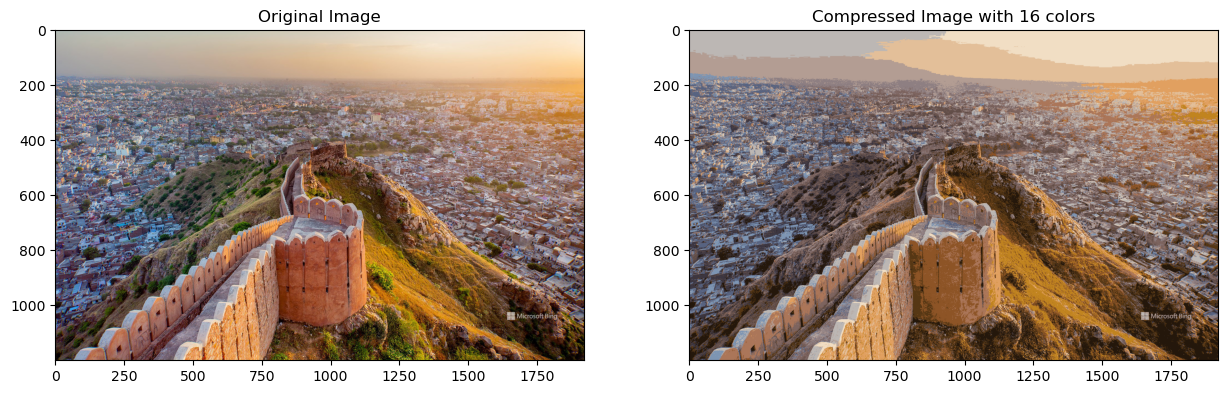

In [31]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot the original image in the first subplot
axs[0].imshow(img)
axs[0].set_title('Original Image')

# Plot the compressed image in the second subplot
axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image with {K} colors')

# Show the plot
plt.show()